# Assignment 3

## Exercise 1: Image in the frequency domain

(a) Select an image and convert it into a grayscale 
floating point.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski
from matplotlib.colors import LogNorm
from skimage import data
import skimage.color as color
img = ski.img_as_float(data.coffee())
imggr = color.rgb2gray(img)
plt.imshow(imggr, cmap='gray')

(b) Apply the Fourier transformation to the image and display it between appropriate values.

**Ans:** for this section we used *fftpack* from *scipy* library which has a complete package for implementing Fourier and Inverse fourier transforms on an image (generally, a matrix with any dimention).

Also there are some other tools like *fftshift* wihich Shifts the zero-frequency component to the center of the spectrum.

More details about fourier functions are available in [Scipy documentations](https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.fft.html)

In [5]:
from scipy import fftpack
F = fftpack.fft2(imggr)

(c) Move the origin of the transform to the center of the frequency 
rectangle. Display the result with and without logarithmic scale, and describe the differences.

**Exp**: The ***LogNorm*** here used because the great difference in the interval of Fourier transform caused by its nature (has Power Function) base the variation is much more than values that we can show in the display. Thus we used ***Log Normalization*** to be able to handle this amount of variation. Change it from  $10^4$ to $ln(10^4)$  in this specific example.

In [6]:
sF = fftpack.fftshift(F)

Text(0.5, 1.0, 'Original')

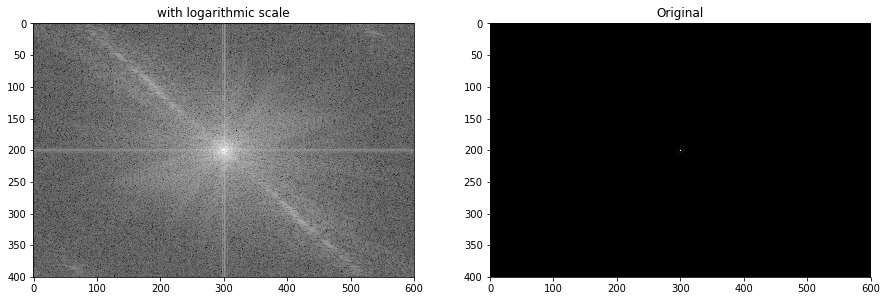

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(15, 15))
ax = axes.ravel()

ax[0].imshow(np.abs(sF), norm = LogNorm(vmin = 0.1,vmax = 10000), cmap ='gray')
ax[0].set_title("with logarithmic scale")
ax[1].imshow(np.abs(sF), cmap ='gray')
ax[1].set_title("Original")

(d) Calculate the phase angle $\phi$ and display it.

**Exp:** There is function in ***Numpy*** which calculates the phase angle of complex numbers, called ***np.angle()*** here.

Since the Fourier transform causes the complex numbers to appear in our data arrays (Image Matrices) we use ***np.abs(A)*** to show amplitude spectrum and np.abs(A)\**2 to show power spectrum. The phase spectrum is obtained by np.angle(A)

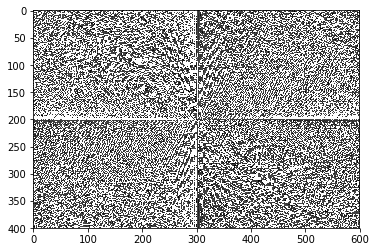

In [8]:
plt.imshow(np.angle(sF), norm = LogNorm(vmin = 0.1,vmax = 10000), cmap ='gray')

(e) Perform the inverse Fourier transformation.

***Exp:*** We don't use LogNorm scale here because when we do the inverse Fourier Transfom everything will be rescaled again.

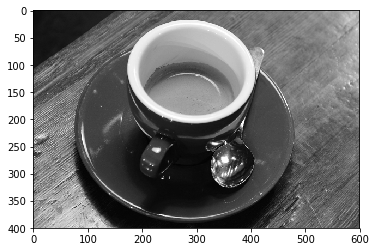

In [9]:
G = fftpack.ifftshift(sF)
g = fftpack.ifft2(G)
plt.imshow(np.abs(g), cmap ='gray')

## Exercise 2: Fourier transformation

Read-in the image $\texttt{wall$\_$bw.jpg}$. This is the wall of the Gerthsen lecture hall in the physics building of the Humboldt University. Apply the Fourier transformation to the image. Can you see 
the logo of the Humboldt University?

(Hint: Before applying the FFT the image has to be converted into a 
floating point. You have to display the image and the FFT of the image between appropiate values.)

#### exp:
Reading the image with io module from scikit image

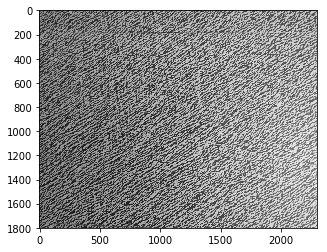

In [10]:
from skimage import io
wall = ski.img_as_float(io.imread('wall_bw.jpg'))
wallgr = color.rgb2gray(wall)
plt.imshow(wallgr, cmap='gray')

In [11]:
from scipy import fftpack
Fwall = fftpack.fft2(wallgr)

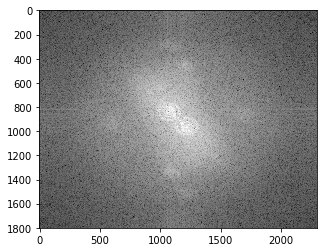

In [12]:
swall = fftpack.fftshift(Fwall)
from matplotlib.pyplot import figure
#figure(num=None, figsize=(5, 5))
plt.imshow(np.abs(swall), norm = LogNorm(vmin = 0.1,vmax = 10000), cmap ='gray')

## Exercise 3: Filter in the frequency domain

(a)  Select an image of your choice and apply a Fourier transformation to it. 

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski
from matplotlib.colors import LogNorm
from skimage import data
import skimage.color as color
from scipy import ndimage
from scipy import fftpack
import scipy
img = ski.img_as_float(data.astronaut())
imggr = color.rgb2gray(img)

(b) Create a $3\times3$ filter in spatial domain that averages the 4-adjacent neighbors of a center point $P(x,y)$ but excludes that point itself from the average. 

***Exp:*** First we have to define $3 \times 3$ matrix to meet the needs of the problem as below with use of ***np.array***

$$
\frac{1}{9} \times \left(\begin{array}{cc} 
0&1&0\\ 
1&0&1\\
0&1&0
\end{array}\right)
$$ 

In [14]:
P = np.array([[0,1,0],[1,0,1],[0,1,0]])/9
print(P)

[[0.         0.11111111 0.        ]
 [0.11111111 0.         0.11111111]
 [0.         0.11111111 0.        ]]


(c) Filter the image in spatial domain with filter $P(x,y)$.

***Exp:*** I have implemented the filter on my image by ***ndimage.convolve()*** from ***scipy*** library. Since our filter mask is symmetric the results of convolution and correlation are not different.

As a result, the filtered image becomes blurred because of the filter's nature which is from smoothing filter family.

Text(0.5, 1.0, 'Original grayscale')

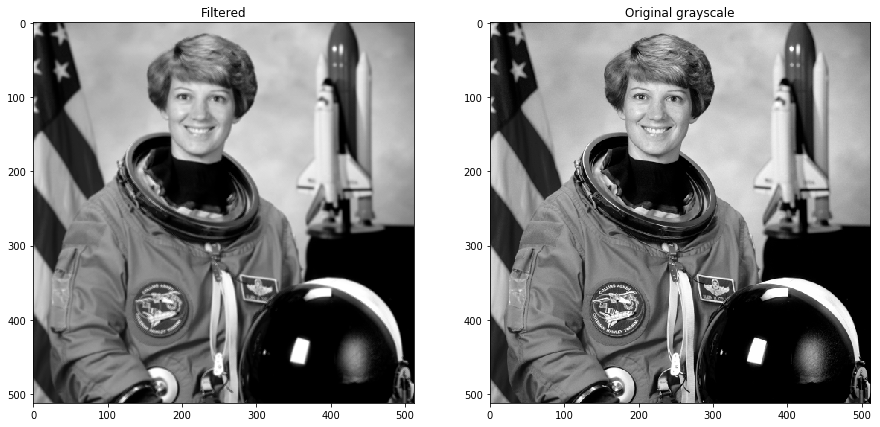

In [15]:
filterdImg = ndimage.convolve(imggr, P)
fig, axes = plt.subplots(1, 2, figsize=(15, 15))
ax = axes.ravel()

ax[0].imshow(filterdImg, cmap ='gray')
ax[0].set_title("Filtered")
ax[1].imshow(imggr, cmap= 'gray')
ax[1].set_title("Original grayscale")

(d) Find an equivalent filter $H(u,v)$ in the frequency domain with the same dimensions as the image.

**Exp:** In order to find the equivalent frequency domain filter of $P(x,y)$. I have implemented Fourier transform on matrix $P$ and after that, I have put the dimensions of my image into another ***fft2*** argument which makes the dimensions of filter the same as the image. Both filters are displayed below.

More informations about the ***ff2*** arguments are available in [scypy library documentation](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.fft.fft2.html#numpy.fft.fft2)

In [16]:
s = imggr.shape
H0dimention = fftpack.fft2(P)
HImgIimention = fftpack.fft2(P,s) #argument changes the dimenstion
H0shift = fftpack.fftshift(H0dimention)
HDshift = fftpack.fftshift(HImgIimention)

Text(0.5, 1.0, 'Image dimention fft filter')

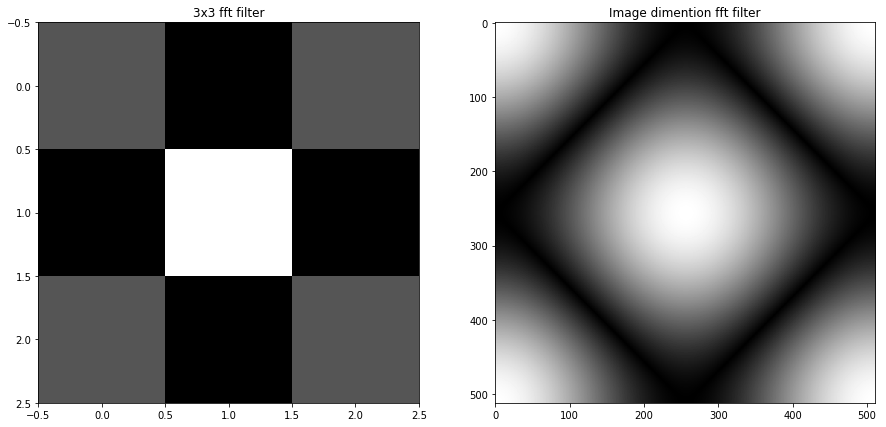

In [17]:
#show the image
fig, axes = plt.subplots(1, 2, figsize=(15, 15))
ax = axes.ravel()

ax[0].imshow(np.abs(H0shift),cmap ='gray')
ax[0].set_title("3x3 fft filter")
ax[1].imshow(np.abs(HDshift), cmap ='gray')
ax[1].set_title("Image dimention fft filter")

(e) Apply your filter to the image and convert the image back to the spatial domain.

Text(0.5, 1.0, 'Frequency filter')

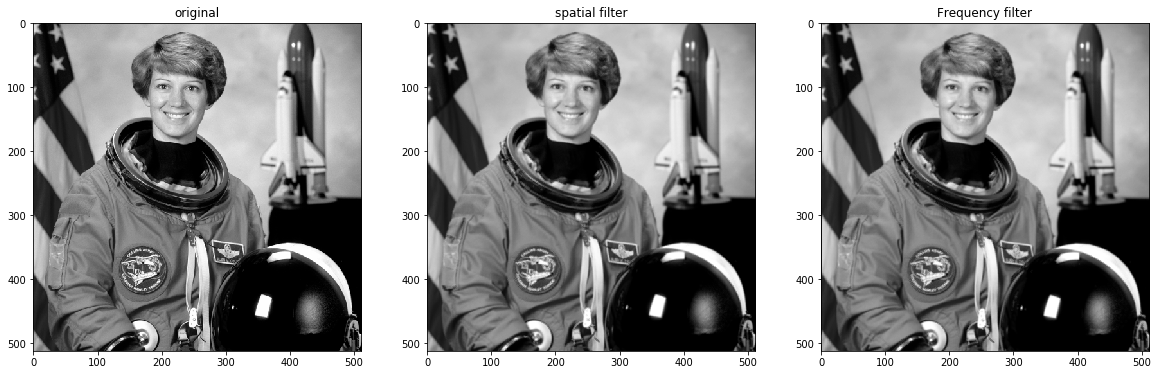

In [18]:
Fimg = fftpack.fft2(imggr)
Fshimg = fftpack.fftshift(Fimg)
Ffiltered = HDshift*Fshimg
FfilteredShifted = fftpack.ifftshift(Ffiltered)
fimg = fftpack.ifft2(FfilteredShifted)

fig, axes = plt.subplots(1, 3, figsize=(20, 20))
ax = axes.ravel()

ax[0].imshow(np.abs(imggr), cmap ='gray')
ax[0].set_title("original")
ax[1].imshow(np.abs(filterdImg), cmap ='gray')
ax[1].set_title("spatial filter")
ax[2].imshow(np.abs(fimg), cmap ='gray')
ax[2].set_title("Frequency filter")

(f) Show that $H(u,v)$ acts like a lowpass filter.

**Exp:** Bese on the result of $H(u,v)$ (Smoother image) and also the shape of the filter you can infer that the filter passing the low frequencies which are positioned next to the middle part of the image and filtering the high frequencies which are next outer parts of the filter.

Text(0.5, 1.0, 'fft filter')

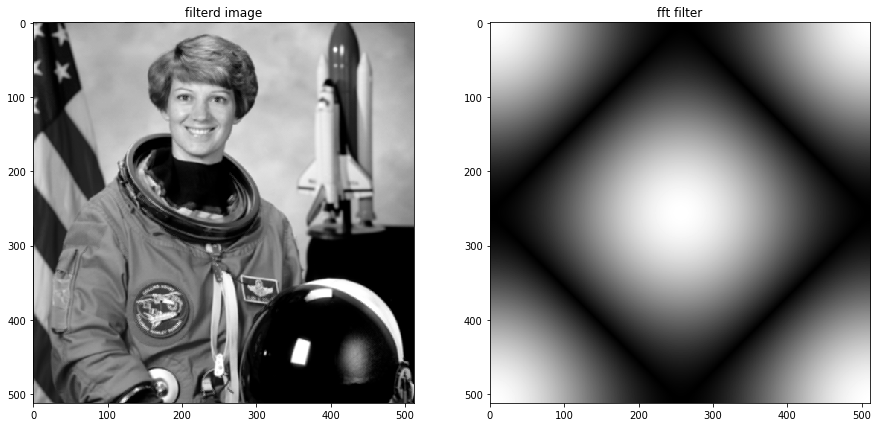

In [19]:
#show the image
fig, axes = plt.subplots(1, 2, figsize=(15, 15))
ax = axes.ravel()

ax[0].imshow(np.abs(fimg), cmap ='gray')
ax[0].set_title("filterd image")
ax[1].imshow(np.abs(HDshift), cmap ='gray')
ax[1].set_title("fft filter")

(g) Compare the results of (c) spatial domain filtering and (e) frequency domain filtering.

**Exp:** I have chosen the subtraction to make the pixels which are different in two filters bolder and as you can see in the result the difference between spatial and frequency filters is shows itself on the edges of the image. Base on the result, the frequency filtered image is sharper near the edges that spatially filtered image.

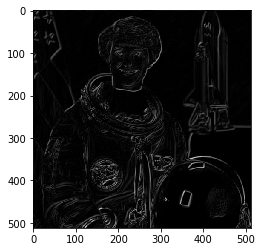

In [20]:
plt.imshow(np.abs(fimg-filterdImg),cmap = 'gray')

## Exercise 4: Low-, high-, and bandpass filter in the frequency domain

### Important
I defined **Himplement()** function, apply the filter to the image, to compress the code a little more and avoid repetitive typing. I redefined all the filters base on lowpass filters given in the first section.

In [21]:
#to apply the filter
def Himplement (H,img):
    shift = ft.fftshift(H)
    Himg = img*shift
    reverse = ft.ifft2(Himg)
    return np.abs(reverse)

(a) Create lowpass filters directly in the frequency domain for the following filter types:

* ideal,
* Butterworth, and
* Gaussian. 

Display the filters. Do you see differences?

In [22]:
import numpy as np
import skimage as ski
from skimage import data
from skimage import color
from skimage import filters
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.colors import LogNorm
from scipy import fftpack
from scipy import fftpack as ft
from scipy import ndimage

Load in the image and transform it into the frequency domain.

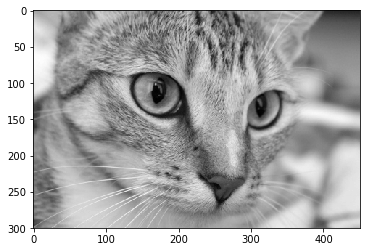

In [23]:
img = ski.img_as_float64(data.chelsea())
gimg = color.rgb2gray(img)
plt.imshow(gimg, cmap='gray')

In [24]:
fft = fftpack.fft2(gimg)
sfft = fftpack.fftshift(fft)

In [25]:
s = img.shape
M = s[0]
N = s[1]

Define the meshgrid:

In [26]:
def dftuv(M,N):
    u = np.arange(0,M)
    v = np.arange(0,N)
    idx = np.where( u > (M/2) )
    idy = np.where( v > (N/2) )
    u[idx] = u[idx]-M
    v[idy] = v[idy]-N
    [V,U] = np.meshgrid(v,u)
    return(U, V)

Define the Ideal lowpass filter:

In [27]:
def ideal_lpfilter(U,V,D0):
    s = U.shape
    D = np.sqrt(U**2 + V**2)
    H = np.zeros((s[0], s[1]))
    H[np.where(D <= D0)]=1
    return (H)

Define the Butterworth lowpass filter:

In [28]:
def butter_lpfilter(U,V,D0, n):
    s = U.shape
    D = np.sqrt(U**2 + V**2)
    H = 1/(1+(D/D0)**(2*n))
    return (H)

Define the Gaussian lowpass filter:

In [29]:
def gaussian_lpfilter(U,V,D0):
    s = U.shape
    D = np.sqrt(U**2 + V**2)
    H = np.exp(-(D**2)/(2*(D0**2)))
    return(H)

Define $D_0$

In [30]:
D0 = 0.05*M

Get the meshgrid coordinates:

In [31]:
[U,V] = dftuv(M, N)

Filter the image with the Butterworth lowpass filter:

In [32]:
Hb = butter_lpfilter(U,V, D0,1.5)

Display the filter

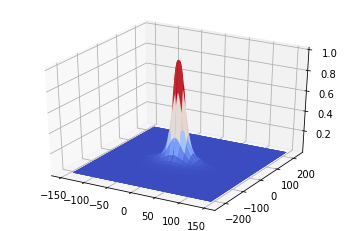

In [33]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(U, V, Hb, rstride = 10, cstride = 10, cmap='coolwarm')

(b)  Apply all three filters to an image of your choice and describe the differences.

In [34]:
#filter defiened
Hi = ideal_lpfilter(U,V,D0)
Hg = gaussian_lpfilter(U,V,D0)
Hb = butter_lpfilter(U,V, D0,3)

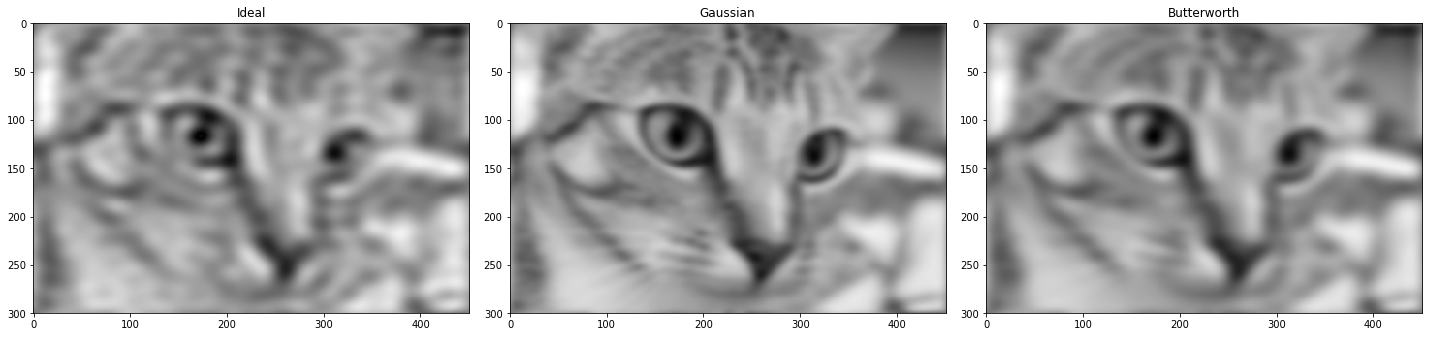

In [35]:
#make the plot
fig, axes = plt.subplots(1, 3, figsize=(20, 20))
ax = axes.ravel()

ax[0].imshow(Himplement(Hi,sfft), cmap ='gray')
ax[0].set_title("Ideal")
ax[1].imshow(Himplement(Hg,sfft), cmap ='gray')
ax[1].set_title("Gaussian")
ax[2].imshow(Himplement(Hb,sfft), cmap ='gray')
ax[2].set_title("Butterworth")

fig.tight_layout()
plt.show()

(c) Select on one of the filters and try out different sizes for $D_0$.

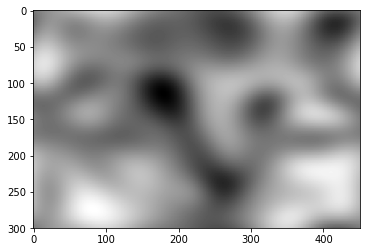

In [36]:
Hg2 = gaussian_lpfilter(U,V,0.01*M)
plt.imshow(Himplement(Hg2,sfft),cmap='gray')

(d) Repeat steps (a) and (b) with highpass filters.

**Exp:** The highpass filters are defined base on formulas in the slids.

In [37]:
#function fo highpass filter
def ideal_hpfilter(U,V,D0):
    s = U.shape
    D = np.sqrt(U**2 + V**2)
    H = np.zeros((s[0], s[1]))
    H[np.where(D > D0)]=1
    return (H)

def butter_hpfilter(U,V,D0, n):
    s = U.shape
    D = np.sqrt(U**2 + V**2)
    H = 1/(1+(D0/D)**(2*n))
    return (H)

def gaussian_hpfilter(U,V,D0):
    s = U.shape
    D = np.sqrt(U**2 + V**2)
    H = 1 - np.exp(-(D**2)/(2*(D0**2)))
    return(H)

In [38]:
#apply the filters
HHi = ideal_hpfilter(U,V,D0)
HHb = butter_hpfilter(U,V, D0,3)
HHg = gaussian_hpfilter(U,V,D0)

/home/psalehi/anaconda3/envs/dip2019/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


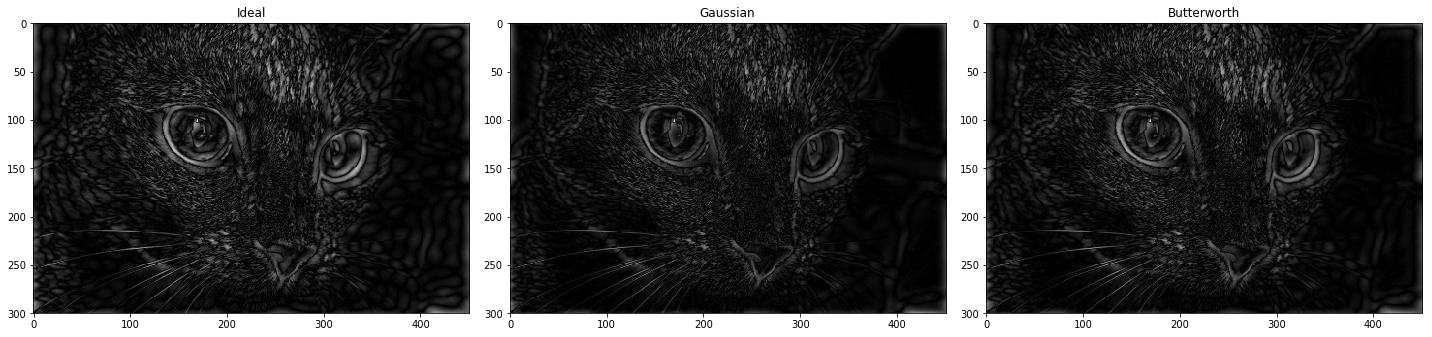

In [39]:
#make the plot
fig, axes = plt.subplots(1, 3, figsize=(20, 20))
ax = axes.ravel()

ax[0].imshow(Himplement(HHi,sfft), cmap ='gray')
ax[0].set_title("Ideal")
ax[1].imshow(Himplement(HHg,sfft), cmap ='gray')
ax[1].set_title("Gaussian")
ax[2].imshow(Himplement(HHb,sfft), cmap ='gray')
ax[2].set_title("Butterworth")

fig.tight_layout()
plt.show()

(e) Repeat steps (a) and (b) with bandpass filters.

Exp: In order to apply the bandpass filters, it is compulsory to define the ***Bandreject*** functions and base the equation below we can find all the bandpass filters.

$$H_{BP}(u,v) = 1 - H_{BR}(u,v)$$

Bandreject filters are defined base on *Table 4.3 - page 199 of "Digital image processing using MATLAB"*

In [40]:
#bandpass filter
def ideal_bpfilter(U,V,D0,W):
    s = U.shape
    D = np.sqrt(U**2 + V**2)
    H = np.zeros((s[0], s[1]))
    H[np.where(D < D0 + (W/2)) and np.where(D > D0 - (W/2))]=1
    return (H)

def butter_bpfilter(U,V,D0, n,W):
    s = U.shape
    D = np.sqrt(U**2 + V**2)
    H = 1 - (1/(1+((W*D)/(D**2 - D0**2))**W*n))
    return (H)

def gaussian_bpfilter(U,V,D0,W):
    s = U.shape
    D = np.sqrt(U**2 + V**2)
    H = 1 - (1 - np.exp(((D**2 - D0**2)/(W*D))**2*-1))
    return(H)

In [41]:
#set W
W = 30

In [42]:
BHi = ideal_bpfilter(U,V,D0,W)
BHb = butter_bpfilter(U,V, D0,3,W)
BHg = gaussian_bpfilter(U,V,D0,W)

/home/psalehi/anaconda3/envs/dip2019/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
/home/psalehi/anaconda3/envs/dip2019/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide


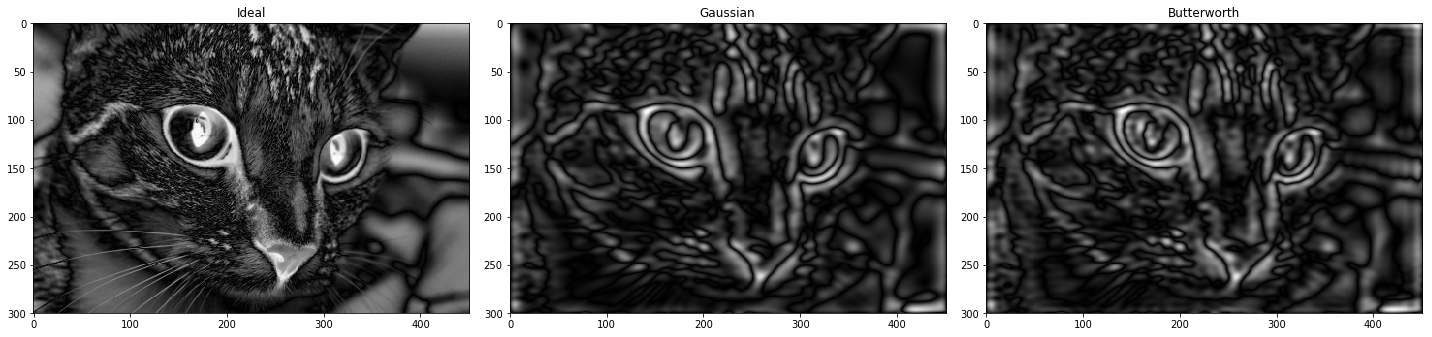

In [43]:
#make the plot
fig, axes = plt.subplots(1, 3, figsize=(20, 20))
ax = axes.ravel()

ax[0].imshow(Himplement(BHi,sfft), cmap ='gray')
ax[0].set_title("Ideal")
ax[1].imshow(Himplement(BHg,sfft), cmap ='gray')
ax[1].set_title("Gaussian")
ax[2].imshow(Himplement(BHb,sfft), cmap ='gray')
ax[2].set_title("Butterworth")

fig.tight_layout()
plt.show()

## Exercise 5: Highpass frequency domain filters

Take a high-contrast grayscale image and do the following:

(a)  Filter the image with an high-pass filter.

**Exp**: In this section, I chose the Butterworth filter and perform exactly the same steps as Ex.4

In [44]:
#use butterworth on an image
img = ski.img_as_float(data.chelsea())
imggr = color.rgb2gray(img)
fimg = Himplement(HHb, imggr)

(b)  Enhance the image with a Butterworth high-frequency emphasis filter.

Definition of High-frequency emphasis filter is:

$$H_{HFE}(u,v) = a + bH_{HP}(u,v)$$

I assumed $a$ and $b$ equal to 1 so the equation becomes like:

$$Image * H_{HFE}(u,v) = Image + Image * bH_{HP}(u,v)$$

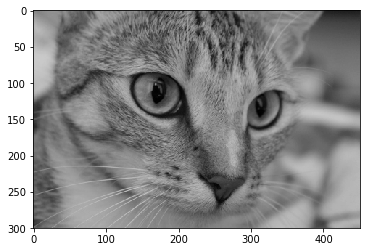

In [45]:
Enhanced = imggr + fimg
plt.imshow(Enhanced, cmap='gray')

(c) Apply histogram equalization to the filtered image. 

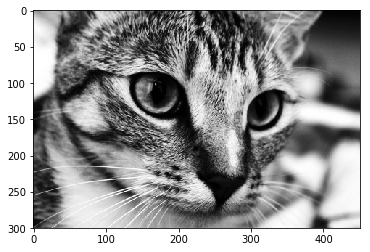

In [46]:
from skimage import exposure
histeq = exposure.equalize_hist(Enhanced)
plt.imshow(histeq,cmap='gray')

(d)  Does a combination of frequency domain processing and spatial domain 
processing yields a better result?

**Ans:** The image is much sharper and the result is much better.

##  Exercise 6: Theoretical Questions

(a) Introduce briefly high-, low-, and bandpass filters and give 
examples, where the filters are used.

**Ans:** 

--------------------------------------------
Generally, these types of filters are members of frequency domain filters.

**Lowpass filters:** Is a filter that let the low-frequency filters pass and filtering the high frequencies which cause the image to be blurred.

**Highpass filter:** Exactly the opposite of lowpass filter. allow the high frequencies to pass and block the low frequencies causing sharpness in an image.

**Bandpass filter:** filtering an image in a specific frequency band with the width W.

--------------------------------------------

(b) Explain the concepts of correlation and convolution.

(c) What is the cut-off frequency?

**Ans:**

--------------------------------------------
**In Gaussian:** When $D(u,v) = D_{0}$ the GLPF is down to 0.607 of its maximum value.

**In Butterworth:** For filters with smooth transfer functions, defining a cutoff frequency locus at points for which $H(u, v)$ is down to a 50%  fraction of its maximum value.

**In Ideal:** After the cutt-off point $D_{0}$ the value for the idle function is 0 for other frequencies.

--------------------------------------------

(d) Read the Articel of Hanisch et al. (2001) about $\texttt{FITS}$-format (on Moodle). Explain shortly what the $\texttt{FITS}$-format is, what is a $\texttt{HEADER}$, and what are the advantage of this file-format for astronomy.

**Ans:**

---
**Explanation:** The Flexible Image Transport System – FITS – was originally developed in the late 1970s to enable the exchange of astronomical image data between computers of different type, with different word lengths and different means of expressing numerical values. Although the IEEE numerical formats have been widely adopted by the computer industry during the past twenty years, and in 1989 the FITS Standard was revised to utilize them, to this day computer manufacturers have yet to agree upon a single standard for bit order.

**Header:** The header of a primary HDU shall consist of a series of card images in ASCII text. All header records shall consist of 36 card images. Card images without information shall be filled with ASCII blanks.

Header card images shall consist of a keyword, a value indicator (optional unless a value is present), a value (optional), and a comment (optional). Except where specifically stated otherwise in this standard, keywords may appear in any order.

**Advantages:** The FITS format is raw and uncompressed, sotred in a text (ASCII) format, contains metadata, or information about how and where the image was obtained.